In [1]:
import pandas as pd
credit_card = pd.read_excel("Credit Card.xlsx")
credit_card.head()

,Age,Job,Marital,Education,Balance,Housing,Loan,Day,Month,Duration,Campaign,Application
0,58,management,married,tertiary,2143,yes,no,5,may,261,1,no
1,44,technician,single,secondary,29,yes,no,5,may,151,1,no
2,33,entrepreneur,married,secondary,2,yes,yes,5,may,76,1,no
3,47,blue-collar,married,unknown,1506,yes,no,5,may,92,1,no
4,33,unknown,single,unknown,1,no,no,5,may,198,1,no


In [2]:
credit_card.shape

(45211, 12)

In [3]:
pd.DataFrame(credit_card["Job"].value_counts())

,Job
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303
housemaid,1240


In [4]:
credit_card = credit_card.drop(columns = ["Day", "Month"])
credit_card.head()

,Age,Job,Marital,Education,Balance,Housing,Loan,Duration,Campaign,Application
0,58,management,married,tertiary,2143,yes,no,261,1,no
1,44,technician,single,secondary,29,yes,no,151,1,no
2,33,entrepreneur,married,secondary,2,yes,yes,76,1,no
3,47,blue-collar,married,unknown,1506,yes,no,92,1,no
4,33,unknown,single,unknown,1,no,no,198,1,no


In [5]:
credit_card = pd.get_dummies(credit_card, columns = (["Job", "Marital", "Education", "Housing", "Loan", "Application"]), drop_first = True)
credit_card.head()

,Age,Balance,Duration,Campaign,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,...,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Housing_yes,Loan_yes,Application_yes
0,58,2143,261,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1,44,29,151,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
2,33,2,76,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,47,1506,92,1,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,33,1,198,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [6]:
credit_card.columns.get_loc("Application_yes")

22

In [7]:
credit_card["Application_yes"].value_counts()

0    39922
1     5289
Name: Application_yes, dtype: int64

In [8]:
cd = credit_card.copy()

In [9]:
cd.shape

(45211, 23)

In [10]:
#down-sample
from sklearn.utils import resample
credit_card_not_apply = credit_card[credit_card["Application_yes"] == 0]
credit_card_apply = credit_card[credit_card["Application_yes"] == 1]

credit_card_not_apply_downsampled = resample(credit_card_not_apply, n_samples = 5289, replace = False, random_state = 0)

credit_card = pd.concat([credit_card_apply, credit_card_not_apply_downsampled])
credit_card["Application_yes"].value_counts()

1    5289
0    5289
Name: Application_yes, dtype: int64

In [11]:
credit_card.shape

(10578, 23)

In [12]:
y = credit_card.iloc[:, 22]
x = credit_card.iloc[:, 0:22]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape

((7404, 22), (3174, 22))

In [13]:
x_train.head()

,Age,Balance,Duration,Campaign,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,...,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Housing_yes,Loan_yes
38844,22,344,347,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
35634,34,1243,157,4,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,1
27283,44,20179,163,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
44935,39,2939,608,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
40797,33,73,156,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [14]:
x_test.head()

,Age,Balance,Duration,Campaign,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,...,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Housing_yes,Loan_yes
5007,32,29050,563,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4031,41,141,299,4,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
36726,39,607,454,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
28716,27,116,46,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
35218,26,-295,556,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [15]:
y_train.head()

38844    1
35634    0
27283    0
44935    1
40797    0
Name: Application_yes, dtype: uint8

In [16]:
y_test.head()

5007     0
4031     0
36726    1
28716    0
35218    0
Name: Application_yes, dtype: uint8

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecisionTreeResult = dtc.fit(x_train, y_train)

In [18]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [19]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7599243856332704

In [20]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,1356,250
Real Non-Applicant,512,1056


In [21]:
TP = applicant.iloc[0,0]
FP = applicant.iloc[1,0]
FN = applicant.iloc[0,1]
TN = applicant.iloc[1,1]

Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/ (TP+FN)
F1_Score = 2*(Precision*Recall)/(Precision+Recall)

pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.759924
Precision,0.725910
Recall,0.844334
F1_Score,0.780656


In [22]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

ModuleNotFoundError: No module named 'pydotplus'

In [23]:
dot_data = export_graphviz(DecisionTreeResult, out_file = None, feature_names = x.columns, class_names = True)
dot_viz = pydotplus.graph_from_dot_data(dot_data)
Image(dot_viz.create_png())
#dot_viz.write_png("Credit Card.png")

NameError: name 'pydotplus' is not defined

In [24]:
Image("Credit Card Decision Tree (DownSampled).png")

NameError: name 'Image' is not defined

In [25]:
c1t = credit_card["Duration"] <= 206.5
credit_card[c1t]["Application_yes"].value_counts()

0    3228
1     937
Name: Application_yes, dtype: int64

In [26]:
c1t = credit_card["Duration"] <= 206.5
c1f = credit_card["Duration"] >= 206.5
c2f = credit_card["Duration"] >= 78.5
c3t = credit_card["Duration"] <= 554.5
c3f = credit_card["Duration"] >=554.5
c5t = credit_card["Housing_yes"] <= 0.5
c6t = credit_card["Housing_yes"] <= 0.5
c6f = credit_card["Housing_yes"] >=0.5
c7t = credit_card["Duration"] <=678.5
c7f = credit_card["Duration"] >= 678.5
c9t = credit_card["Campaign"] <= 3.5
c11t = credit_card["Balance"] <= 61.5
c11f = credit_card["Balance"] >= 61.5
c12f = credit_card["Duration"] >= 341.5
c13t = credit_card["Age"] <= 58.5
c13f = credit_card["Age"] >= 58.5
c14t = credit_card["Job_retired"] <= 0.5
c14f = credit_card["Job_retired"] >=0.5

 

TA1 = (c1t&c2f&c5t&c9t)
TA2 = (c1f&c3t&c6t&c11t)
TA3 = (c1f&c3t&c6t&c11f)
TA4 = (c1f&c3t&c6f&c12f)
TA5 = (c1f&c3f&c7t&c13t)
TA6 = (c1f&c3f&c7t&c13f)
TA7 = (c1f&c3f&c7f&c14t)
TA8 = (c1f&c3f&c7f&c14f)

Applicant_Result = pd.DataFrame(data = (
    credit_card[TA1]["Application_yes"].value_counts(),
    credit_card[TA2]["Application_yes"].value_counts(),
    credit_card[TA3]["Application_yes"].value_counts(),
    credit_card[TA4]["Application_yes"].value_counts(),
    credit_card[TA5]["Application_yes"].value_counts(),
    credit_card[TA6]["Application_yes"].value_counts(),
    credit_card[TA7]["Application_yes"].value_counts(),
    credit_card[TA8]["Application_yes"].value_counts()),
             index = ["TA1", "TA2", "TA3", "TA4", "TA5", "TA6", "TA7", "TA8"],
            )
Applicant_Result

,0,1
TA1,747,640
TA2,177,157
TA3,498,1523
TA4,389,376
TA5,127,473
TA6,2,51
TA7,160,1397
TA8,6,102


# Applying SVM model on given dataset

In [27]:
from sklearn import svm

In [69]:
clf = svm.SVC(probability=True,C = 3)

In [70]:
clf.fit(x_train , y_train)

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
# Accuracy score for our model

In [72]:
clf.score(x_train, y_train)

0.9994597514856834

In [73]:
clf.score(x_test, y_test)

0.498109640831758

In [74]:
#C = [1,2,3,4,5]
#gammas = [0.1, 1, 10, 100]
#min_samples_leaf= list(range(1,20))

In [75]:
#clf = svm.SVC(probability=True)

In [76]:
'''import numpy as np
from sklearn.model_selection import GridSearchCV
np.random.seed(3)
param_grid = dict(C=C,gamma = gammas)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, n_jobs=-1)
grid_result = grid.fit(x_train , y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''

'import numpy as np\nfrom sklearn.model_selection import GridSearchCV\nnp.random.seed(3)\nparam_grid = dict(C=C,gamma = gammas)\ngrid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, n_jobs=-1)\ngrid_result = grid.fit(x_train , y_train)\n# Summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'

In [77]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [78]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.498109640831758

In [79]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,221,1408
Real Non-Applicant,185,1360


In [80]:
TP = applicant.iloc[0,0]
FP = applicant.iloc[1,0]
FN = applicant.iloc[0,1]
TN = applicant.iloc[1,1]

Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/ (TP+FN)
F1_Score = 2*(Precision*Recall)/(Precision+Recall)

pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.498110
Precision,0.544335
Recall,0.135666
F1_Score,0.217199


# Applying Random Forrest on Dataset

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.7695845643214064


In [33]:
bootstrap=[True,False]
max_features=[3,4,5,6,7,8,9]
n_estimators=[10,50,100]

In [34]:
param_grid = dict(bootstrap=bootstrap,max_features=max_features,n_estimators=n_estimators)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 10, n_jobs=-1)

grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.791059 using {'bootstrap': True, 'max_features': 6, 'n_estimators': 50}


In [35]:
grid_result.best_params_

bootstraap = grid.best_params_['bootstrap']
max_features = grid.best_params_['max_features']
n_estimators = grid.best_params_['n_estimators']

print(n_estimators)

50


In [36]:
model = RandomForestClassifier(bootstrap=bootstrap, max_features = max_features,n_estimators=n_estimators)

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=[True, False], class_weight=None,
            criterion='gini', max_depth=None, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [38]:
model.score(x_train,y_train)

0.9997298757428417

In [39]:
model.score(x_test,y_test)

0.7920604914933838

In [40]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [41]:
metrics.accuracy_score(y_test, y_pred)

0.7920604914933838

In [42]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,1255,351
Real Non-Applicant,309,1259


In [43]:
        TP = applicant.iloc[0,0]
        FP = applicant.iloc[1,0]
        FN = applicant.iloc[0,1]
        TN = applicant.iloc[1,1]

        Accuracy = (TP+TN)/(TP+FP+FN+TN)
        Precision = TP/(TP+FP)
        Recall = TP/ (TP+FN)
        F1_Score = 2*(Precision*Recall)/(Precision+Recall)

        pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.792060
Precision,0.802430
Recall,0.781445
F1_Score,0.791798


# Applying K-NN to dataset

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int6

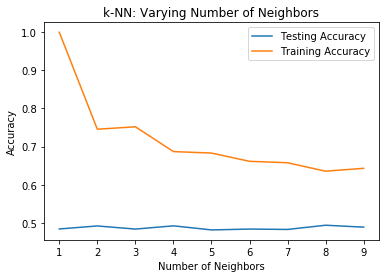

ran


In [45]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=11)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(x_train)
    scaledX_test = sc.transform(x_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
print('ran')

In [46]:
knn = KNeighborsClassifier(n_neighbors=3)

In [47]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [48]:
knn.score(x_train,y_train)

0.7541869259859535

In [49]:
knn.score(x_test,y_test)

0.5

In [50]:
y_pred = knn.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [51]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.5

In [52]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,802,827
Real Non-Applicant,760,785


In [53]:
        TP = applicant.iloc[0,0]
        FP = applicant.iloc[1,0]
        FN = applicant.iloc[0,1]
        TN = applicant.iloc[1,1]

        Accuracy = (TP+TN)/(TP+FP+FN+TN)
        Precision = TP/(TP+FP)
        Recall = TP/ (TP+FN)
        F1_Score = 2*(Precision*Recall)/(Precision+Recall)

        pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.500000
Precision,0.513444
Recall,0.492327
F1_Score,0.502664


# Trying all the above model on data without doing downsampling

In [54]:
y = cd.iloc[:, 22]
x = cd.iloc[:, 0:22]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape

((31647, 22), (13564, 22))

In [55]:
x_train.head()

,Age,Balance,Duration,Campaign,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,...,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Housing_yes,Loan_yes
24951,58,1021,205,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
22129,55,196,168,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
986,50,159,216,2,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
14999,43,1880,63,6,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4027,53,647,512,6,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [56]:
x_test.head()

,Age,Balance,Duration,Campaign,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,...,Job_technician,Job_unemployed,Job_unknown,Marital_married,Marital_single,Education_secondary,Education_tertiary,Education_unknown,Housing_yes,Loan_yes
14001,37,1403,91,15,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
32046,36,-253,1073,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
13318,47,-406,243,5,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
42991,57,501,105,7,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
14237,33,-406,332,2,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1


In [57]:
y_train.head()

24951    0
22129    0
986      0
14999    0
4027     0
Name: Application_yes, dtype: uint8

In [58]:
y_test.head()

14001    0
32046    1
13318    0
42991    0
14237    0
Name: Application_yes, dtype: uint8

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecisionTreeResult = dtc.fit(x_train, y_train)

In [60]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [61]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8849159539958714

In [62]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,11642,327
Real Non-Applicant,1234,361


In [63]:
TP = applicant.iloc[0,0]
FP = applicant.iloc[1,0]
FN = applicant.iloc[0,1]
TN = applicant.iloc[1,1]

Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/ (TP+FN)
F1_Score = 2*(Precision*Recall)/(Precision+Recall)

pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.884916
Precision,0.904163
Recall,0.972679
F1_Score,0.937170


In [64]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

ModuleNotFoundError: No module named 'pydotplus'

In [65]:
dot_data = export_graphviz(DecisionTreeResult, out_file = None, feature_names = x.columns, class_names = True)
dot_viz = pydotplus.graph_from_dot_data(dot_data)
Image(dot_viz.create_png())
#dot_viz.write_png("Credit Card.png")

NameError: name 'pydotplus' is not defined

In [66]:
Image("Credit Card Decision Tree (DownSampled).png")

NameError: name 'Image' is not defined

In [67]:
c1t = cd["Duration"] <= 206.5
cd[c1t]["Application_yes"].value_counts()

0    24568
1      937
Name: Application_yes, dtype: int64

In [68]:
c1t = cd["Duration"] <= 206.5
c1f = cd["Duration"] >= 206.5
c2f = cd["Duration"] >= 78.5
c3t = cd["Duration"] <= 554.5
c3f = cd["Duration"] >=554.5
c5t = cd["Housing_yes"] <= 0.5
c6t = cd["Housing_yes"] <= 0.5
c6f = cd["Housing_yes"] >=0.5
c7t = cd["Duration"] <=678.5
c7f = cd["Duration"] >= 678.5
c9t = cd["Campaign"] <= 3.5
c11t = cd["Balance"] <= 61.5
c11f = cd["Balance"] >= 61.5
c12f = cd["Duration"] >= 341.5
c13t = cd["Age"] <= 58.5
c13f = cd["Age"] >= 58.5
c14t = cd["Job_retired"] <= 0.5
c14f = cd["Job_retired"] >=0.5

 

TA1 = (c1t&c2f&c5t&c9t)
TA2 = (c1f&c3t&c6t&c11t)
TA3 = (c1f&c3t&c6t&c11f)
TA4 = (c1f&c3t&c6f&c12f)
TA5 = (c1f&c3f&c7t&c13t)
TA6 = (c1f&c3f&c7t&c13f)
TA7 = (c1f&c3f&c7f&c14t)
TA8 = (c1f&c3f&c7f&c14f)

Applicant_Result = pd.DataFrame(data = (
    cd[TA1]["Application_yes"].value_counts(),
    cd[TA2]["Application_yes"].value_counts(),
    cd[TA3]["Application_yes"].value_counts(),
    cd[TA4]["Application_yes"].value_counts(),
    cd[TA5]["Application_yes"].value_counts(),
    cd[TA6]["Application_yes"].value_counts(),
    cd[TA7]["Application_yes"].value_counts(),
    cd[TA8]["Application_yes"].value_counts()),
             index = ["TA1", "TA2", "TA3", "TA4", "TA5", "TA6", "TA7", "TA8"],
            )
Applicant_Result

,0,1
TA1,5709,640
TA2,1277,157
TA3,3820,1523
TA4,2785,376
TA5,971,473
TA6,45,51
TA7,1297,1397
TA8,75,102


# Applying SVM model on given dataset

In [99]:
from sklearn import svm

In [100]:
clf = svm.SVC(probability=True,C = 3)

In [ ]:
clf.fit(x_train , y_train)

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# Accuracy score for our model

In [ ]:
clf.score(x_train, y_train)

In [ ]:
clf.score(x_test, y_test)

In [74]:
#C = [1,2,3,4,5]
#gammas = [0.1, 1, 10, 100]
#min_samples_leaf= list(range(1,20))

In [75]:
#clf = svm.SVC(probability=True)

In [76]:
'''import numpy as np
from sklearn.model_selection import GridSearchCV
np.random.seed(3)
param_grid = dict(C=C,gamma = gammas)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, n_jobs=-1)
grid_result = grid.fit(x_train , y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'''

'import numpy as np\nfrom sklearn.model_selection import GridSearchCV\nnp.random.seed(3)\nparam_grid = dict(C=C,gamma = gammas)\ngrid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, n_jobs=-1)\ngrid_result = grid.fit(x_train , y_train)\n# Summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))'

In [77]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [78]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.498109640831758

In [79]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,221,1408
Real Non-Applicant,185,1360


In [80]:
TP = applicant.iloc[0,0]
FP = applicant.iloc[1,0]
FN = applicant.iloc[0,1]
TN = applicant.iloc[1,1]

Accuracy = (TP+TN)/(TP+FP+FN+TN)
Precision = TP/(TP+FP)
Recall = TP/ (TP+FN)
F1_Score = 2*(Precision*Recall)/(Precision+Recall)

pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.498110
Precision,0.544335
Recall,0.135666
F1_Score,0.217199


# Applying Random Forrest on Dataset

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\ensemble\forest

0.8852025651933382


In [71]:
bootstrap=[True,False]
max_features=[3,4,5,6,7,8,9]
n_estimators=[10,50,100]

In [72]:
param_grid = dict(bootstrap=bootstrap,max_features=max_features,n_estimators=n_estimators)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv = 10, n_jobs=-1)

grid_result = grid.fit(x_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.890385 using {'bootstrap': True, 'max_features': 4, 'n_estimators': 50}


In [73]:
grid_result.best_params_

bootstraap = grid.best_params_['bootstrap']
max_features = grid.best_params_['max_features']
n_estimators = grid.best_params_['n_estimators']

print(n_estimators)

50


In [74]:
model = RandomForestClassifier(bootstrap=bootstrap, max_features = max_features,n_estimators=n_estimators)

In [75]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=[True, False], class_weight=None,
            criterion='gini', max_depth=None, max_features=4,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [76]:
model.score(x_train,y_train)

0.9995892185673207

In [77]:
model.score(x_test,y_test)

0.8886759068121498

In [78]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [79]:
metrics.accuracy_score(y_test, y_pred)

0.8886759068121498

In [80]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,11619,350
Real Non-Applicant,1160,435


In [81]:
        TP = applicant.iloc[0,0]
        FP = applicant.iloc[1,0]
        FN = applicant.iloc[0,1]
        TN = applicant.iloc[1,1]

        Accuracy = (TP+TN)/(TP+FP+FN+TN)
        Precision = TP/(TP+FP)
        Recall = TP/ (TP+FN)
        F1_Score = 2*(Precision*Recall)/(Precision+Recall)

        pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.888676
Precision,0.909226
Recall,0.970758
F1_Score,0.938985


# Applying K-NN to dataset

C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by Sta

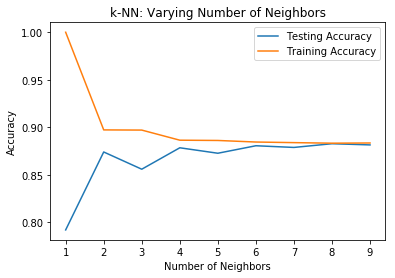

ran


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    train = []
    test = []
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=11)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(x_train)
    scaledX_test = sc.transform(x_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    train.append(knn.score(scaledX_train,y_train))
    test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
print('ran')

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)

In [92]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [93]:
knn.score(x_train,y_train)

0.8971466489714665

In [94]:
knn.score(x_test,y_test)

0.853288115600118

In [95]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [96]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.853288115600118

In [97]:
applicant = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), columns = ["Pred Applicant", "Pred Non-Applicant"] , index = ["Real Applicant", "Real Non-Applicant"]) 
applicant
# In this case, we will like to minimize type II error

,Pred Applicant,Pred Non-Applicant
Real Applicant,11514,467
Real Non-Applicant,1523,60


In [98]:
        TP = applicant.iloc[0,0]
        FP = applicant.iloc[1,0]
        FN = applicant.iloc[0,1]
        TN = applicant.iloc[1,1]

        Accuracy = (TP+TN)/(TP+FP+FN+TN)
        Precision = TP/(TP+FP)
        Recall = TP/ (TP+FN)
        F1_Score = 2*(Precision*Recall)/(Precision+Recall)

        pd.DataFrame(data = (Accuracy, Precision, Recall, F1_Score), index = ["Accuracy", "Precision", "Recall", "F1_Score"], columns = ["Figure"])

,Figure
Accuracy,0.853288
Precision,0.883179
Recall,0.961022
F1_Score,0.920457
